**Step 1: Import Necessary Libraries**

In [12]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

**Step 2: Load the Dataset**

In [13]:
# Loading the California housing dataset
house_price_dataset = datasets.fetch_california_housing()

# Loading the dataset into a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)

# Add the target column to the dataframe
house_price_dataframe['price'] = house_price_dataset.target

# Display the first few rows of the dataframe
house_price_dataframe.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Step 3: Preprocess the Data**

In [14]:
# Checking for missing values
missing_values = house_price_dataframe.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Statistical measures of the dataset
print(house_price_dataframe.describe())


Missing values in each column:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  

**Step 4: Split the Data into Training and Testing Sets**

In [15]:
# Splitting the dataset into features and target variable
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Displaying the shape of the data
print(X.shape, X_train.shape, X_test.shape)


(20640, 8) (16512, 8) (4128, 8)


**Step 5: Linear Regression Model**

In [16]:
# Creating and training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Making predictions on training and test data
train_predictions_linear = linear_model.predict(X_train)
test_predictions_linear = linear_model.predict(X_test)

# Calculating Mean Squared Error for both training and test data
mse_train_linear = metrics.mean_squared_error(Y_train, train_predictions_linear)
mse_test_linear = metrics.mean_squared_error(Y_test, test_predictions_linear)

print('Linear Regression - Mean Squared Error (Train):', mse_train_linear)
print('Linear Regression - Mean Squared Error (Test):', mse_test_linear)


Linear Regression - Mean Squared Error (Train): 0.521993512908973
Linear Regression - Mean Squared Error (Test): 0.5369436868087006


**Step 6: Decision Tree Model**

In [17]:
# Creating and training the Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, Y_train)

# Making predictions on training and test data
train_predictions_tree = decision_tree_model.predict(X_train)
test_predictions_tree = decision_tree_model.predict(X_test)

# Calculating Mean Squared Error for both training and test data
mse_train_tree = metrics.mean_squared_error(Y_train, train_predictions_tree)
mse_test_tree = metrics.mean_squared_error(Y_test, test_predictions_tree)

print('Decision Tree - Mean Squared Error (Train):', mse_train_tree)
print('Decision Tree - Mean Squared Error (Test):', mse_test_tree)


Decision Tree - Mean Squared Error (Train): 9.397343753450401e-32
Decision Tree - Mean Squared Error (Test): 0.5581350197088663


**Step 7: Visualize the Results**

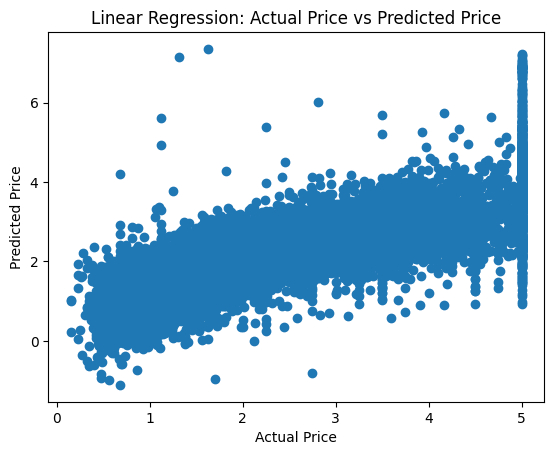

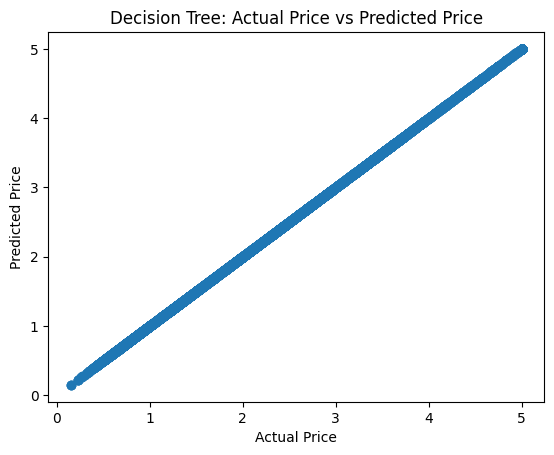

In [18]:
# Visualizing the predictions of the Linear Regression model
plt.scatter(Y_train, train_predictions_linear)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual Price vs Predicted Price")
plt.show()

# Visualizing the predictions of the Decision Tree model
plt.scatter(Y_train, train_predictions_tree)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree: Actual Price vs Predicted Price")
plt.show()
